2022-12-02 11:22:02.411 - [INFO] base_model._build_model(572): Start building Single Particle Model
2022-12-02 11:22:02.546 - [INFO] base_battery_model.build_model(1019): Finish building Single Particle Model
2022-12-02 11:22:02.559 - [INFO] callbacks.on_experiment_start(166): Start running experiment
2022-12-02 11:22:02.560 - [INFO] parameter_values.process_model(371): Start setting parameters for Single Particle Model
2022-12-02 11:22:02.624 - [INFO] parameter_values.process_model(474): Finish setting parameters for Single Particle Model
2022-12-02 11:22:02.625 - [INFO] parameter_values.process_model(371): Start setting parameters for Single Particle Model
2022-12-02 11:22:02.679 - [INFO] parameter_values.process_model(474): Finish setting parameters for Single Particle Model
2022-12-02 11:22:02.683 - [INFO] parameter_values.process_model(371): Start setting parameters for Single Particle Model
2022-12-02 11:22:02.758 - [INFO] parameter_values.process_model(474): Finish setting param

2022-12-02 11:22:03.930 - [NOTICE] callbacks.on_cycle_start(174): Cycle 8/15 (606.743 ms elapsed) --------------------
2022-12-02 11:22:03.931 - [NOTICE] callbacks.on_step_start(182): Cycle 8/15, step 1/1: Charge at C/3 until 4 V
2022-12-02 11:22:04.001 - [INFO] base_solver.solve(703): Start solving ElectrodeSOH model with Algebraic solver (lm)
2022-12-02 11:22:04.002 - [INFO] base_solver.solve(936): Finish solving ElectrodeSOH model (success)
2022-12-02 11:22:04.003 - [INFO] base_solver.solve(937): Set-up time: 22.000 us, Solve time: 984.700 us (of which integration time: 615.400 us), Total time: 1.007 ms
2022-12-02 11:22:04.005 - [NOTICE] callbacks.on_cycle_start(174): Cycle 9/15 (682.147 ms elapsed) --------------------
2022-12-02 11:22:04.006 - [NOTICE] callbacks.on_step_start(182): Cycle 9/15, step 1/1: Charge at 4 V until 5 mA
2022-12-02 11:22:04.035 - [INFO] base_solver.solve(703): Start solving ElectrodeSOH model with Algebraic solver (lm)
2022-12-02 11:22:04.037 - [INFO] base_

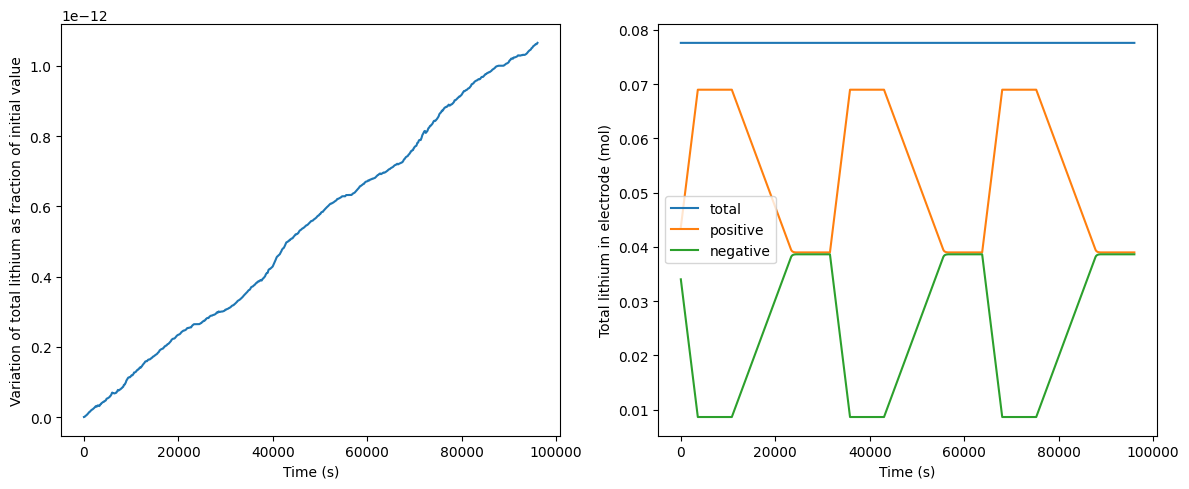

In [3]:
#
# Check conservation of lithium SPM
#

import pybamm
import matplotlib.pyplot as plt

pybamm.set_logging_level("INFO")

model = pybamm.lithium_ion.SPM()

experiment = pybamm.Experiment(
    [
        "Discharge at 1C until 3.2 V",
        "Rest for 2 hours",
        "Charge at C/3 until 4 V",
        "Charge at 4 V until 5 mA",
        "Rest for 2 hours",
    ]
    * 3
)

sim = pybamm.Simulation(model, experiment=experiment)
sim.solve()
solution = sim.solution

t = solution["Time [s]"].entries
Np = solution["Total lithium in positive electrode [mol]"].entries
Nn = solution["Total lithium in negative electrode [mol]"].entries
Ntot = solution["Total lithium [mol]"].entries

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(t, Ntot / Ntot[0] - 1)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Variation of total lithium as fraction of initial value")

ax[1].plot(t, Np + Nn, label="total")
ax[1].plot(t, Np, label="positive")
ax[1].plot(t, Nn, label="negative")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Total lithium in electrode (mol)")
ax[1].legend()

fig.tight_layout()

plt.show()


2022-12-02 11:23:00.654 - [INFO] base_model._build_model(572): Start building Single Particle Model with electrolyte
2022-12-02 11:23:00.737 - [INFO] base_battery_model.build_model(1019): Finish building Single Particle Model with electrolyte
2022-12-02 11:23:00.741 - [INFO] callbacks.on_experiment_start(166): Start running experiment
2022-12-02 11:23:00.743 - [INFO] parameter_values.process_model(371): Start setting parameters for Single Particle Model with electrolyte
2022-12-02 11:23:00.839 - [INFO] parameter_values.process_model(474): Finish setting parameters for Single Particle Model with electrolyte
2022-12-02 11:23:00.841 - [INFO] parameter_values.process_model(371): Start setting parameters for Single Particle Model with electrolyte
2022-12-02 11:23:00.933 - [INFO] parameter_values.process_model(474): Finish setting parameters for Single Particle Model with electrolyte
2022-12-02 11:23:00.933 - [INFO] parameter_values.process_model(371): Start setting parameters for Single Par

2022-12-02 11:23:03.011 - [INFO] base_solver.solve(936): Finish solving ElectrodeSOH model (success)
2022-12-02 11:23:03.013 - [INFO] base_solver.solve(937): Set-up time: 34.500 us, Solve time: 1.083 ms (of which integration time: 630.300 us), Total time: 1.117 ms
2022-12-02 11:23:03.016 - [NOTICE] callbacks.on_cycle_start(174): Cycle 8/15 (898.272 ms elapsed) --------------------
2022-12-02 11:23:03.017 - [NOTICE] callbacks.on_step_start(182): Cycle 8/15, step 1/1: Charge at C/3 until 4 V
2022-12-02 11:23:03.111 - [INFO] base_solver.solve(703): Start solving ElectrodeSOH model with Algebraic solver (lm)
2022-12-02 11:23:03.117 - [INFO] base_solver.solve(936): Finish solving ElectrodeSOH model (success)
2022-12-02 11:23:03.119 - [INFO] base_solver.solve(937): Set-up time: 38.500 us, Solve time: 2.795 ms (of which integration time: 1.773 ms), Total time: 2.833 ms
2022-12-02 11:23:03.123 - [NOTICE] callbacks.on_cycle_start(174): Cycle 9/15 (1.006 s elapsed) --------------------
2022-12-0

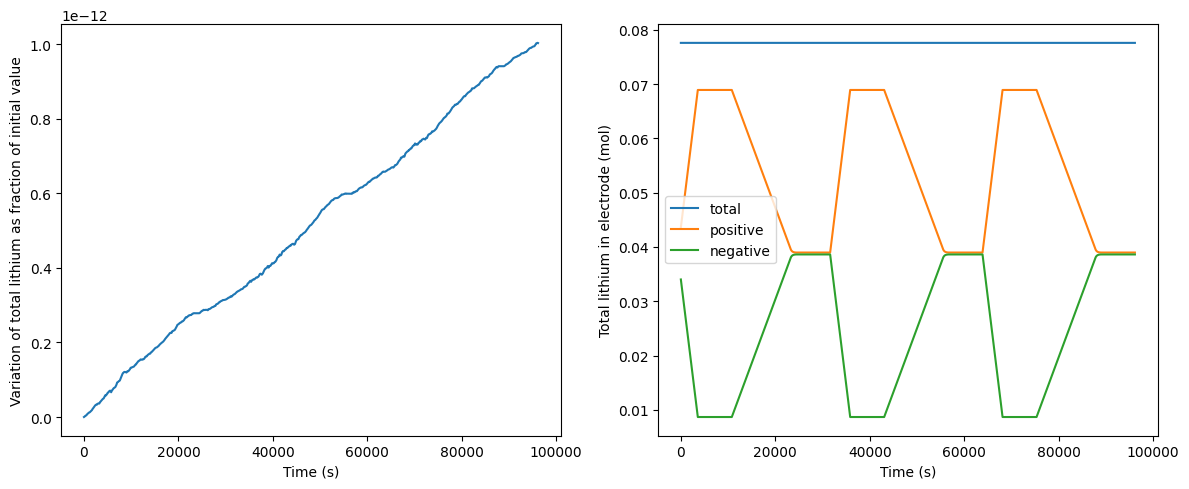

In [5]:
#
# Check conservation of lithium SPMe
#

import pybamm
import matplotlib.pyplot as plt

pybamm.set_logging_level("INFO")

model = pybamm.lithium_ion.SPMe()

experiment = pybamm.Experiment(
    [
        "Discharge at 1C until 3.2 V",
        "Rest for 2 hours",
        "Charge at C/3 until 4 V",
        "Charge at 4 V until 5 mA",
        "Rest for 2 hours",
    ]
    * 3
)

sim = pybamm.Simulation(model, experiment=experiment)
sim.solve()
solution = sim.solution

t = solution["Time [s]"].entries
Np = solution["Total lithium in positive electrode [mol]"].entries
Nn = solution["Total lithium in negative electrode [mol]"].entries
Ntot = solution["Total lithium [mol]"].entries

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(t, Ntot / Ntot[0] - 1)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Variation of total lithium as fraction of initial value")

ax[1].plot(t, Np + Nn, label="total")
ax[1].plot(t, Np, label="positive")
ax[1].plot(t, Nn, label="negative")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Total lithium in electrode (mol)")
ax[1].legend()

fig.tight_layout()

plt.show()


2022-12-02 11:23:14.221 - [INFO] base_model._build_model(572): Start building Doyle-Fuller-Newman model
2022-12-02 11:23:14.266 - [INFO] base_battery_model.build_model(1019): Finish building Doyle-Fuller-Newman model
2022-12-02 11:23:14.271 - [INFO] callbacks.on_experiment_start(166): Start running experiment
2022-12-02 11:23:14.274 - [INFO] parameter_values.process_model(371): Start setting parameters for Doyle-Fuller-Newman model
2022-12-02 11:23:14.353 - [INFO] parameter_values.process_model(474): Finish setting parameters for Doyle-Fuller-Newman model
2022-12-02 11:23:14.355 - [INFO] parameter_values.process_model(371): Start setting parameters for Doyle-Fuller-Newman model
2022-12-02 11:23:14.433 - [INFO] parameter_values.process_model(474): Finish setting parameters for Doyle-Fuller-Newman model
2022-12-02 11:23:14.435 - [INFO] parameter_values.process_model(371): Start setting parameters for Doyle-Fuller-Newman model
2022-12-02 11:23:14.508 - [INFO] parameter_values.process_mode

2022-12-02 11:23:20.313 - [NOTICE] callbacks.on_cycle_start(174): Cycle 8/15 (4.396 s elapsed) --------------------
2022-12-02 11:23:20.314 - [NOTICE] callbacks.on_step_start(182): Cycle 8/15, step 1/1: Charge at C/3 until 4 V
2022-12-02 11:23:21.327 - [INFO] base_solver.solve(703): Start solving ElectrodeSOH model with Algebraic solver (lm)
2022-12-02 11:23:21.330 - [INFO] base_solver.solve(936): Finish solving ElectrodeSOH model (success)
2022-12-02 11:23:21.331 - [INFO] base_solver.solve(937): Set-up time: 31.200 us, Solve time: 1.809 ms (of which integration time: 1.075 ms), Total time: 1.841 ms
2022-12-02 11:23:21.335 - [NOTICE] callbacks.on_cycle_start(174): Cycle 9/15 (5.417 s elapsed) --------------------
2022-12-02 11:23:21.335 - [NOTICE] callbacks.on_step_start(182): Cycle 9/15, step 1/1: Charge at 4 V until 5 mA
2022-12-02 11:23:21.496 - [INFO] base_solver.solve(703): Start solving ElectrodeSOH model with Algebraic solver (lm)
2022-12-02 11:23:21.496 - [INFO] base_solver.sol

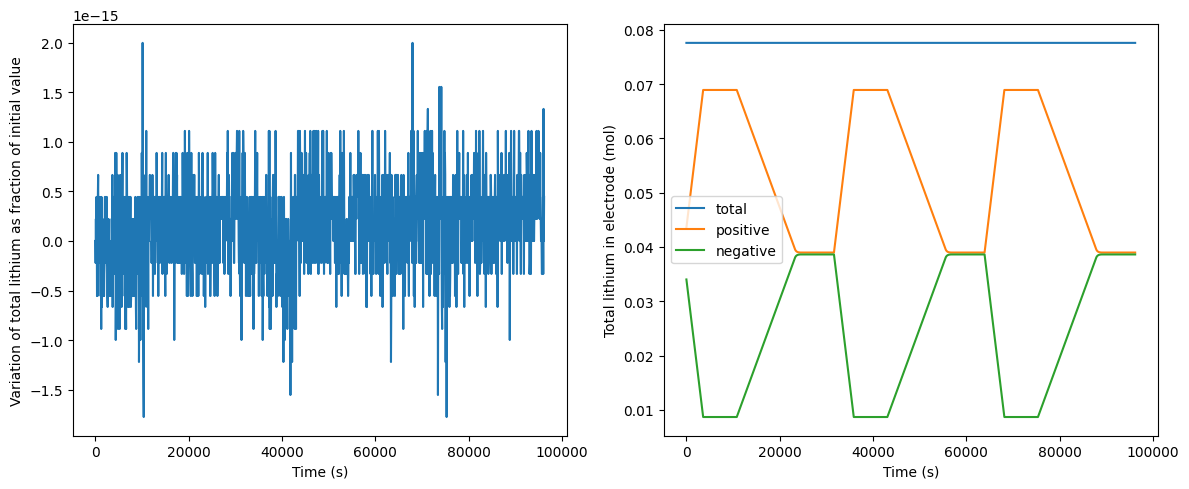

In [6]:
#
# Check conservation of lithium
#

import pybamm
import matplotlib.pyplot as plt

pybamm.set_logging_level("INFO")

model = pybamm.lithium_ion.DFN()

experiment = pybamm.Experiment(
    [
        "Discharge at 1C until 3.2 V",
        "Rest for 2 hours",
        "Charge at C/3 until 4 V",
        "Charge at 4 V until 5 mA",
        "Rest for 2 hours",
    ]
    * 3
)

sim = pybamm.Simulation(model, experiment=experiment)
sim.solve()
solution = sim.solution

t = solution["Time [s]"].entries
Np = solution["Total lithium in positive electrode [mol]"].entries
Nn = solution["Total lithium in negative electrode [mol]"].entries
Ntot = solution["Total lithium [mol]"].entries

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(t, Ntot / Ntot[0] - 1)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Variation of total lithium as fraction of initial value")

ax[1].plot(t, Np + Nn, label="total")
ax[1].plot(t, Np, label="positive")
ax[1].plot(t, Nn, label="negative")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Total lithium in electrode (mol)")
ax[1].legend()

fig.tight_layout()

plt.show()
